In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
data = pd.read_csv('Character_TrainData.csv')
data.sort_values('label')

data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,125,136,130,132,135,132,132,133,133,...,242,237,213,91,80,239,210,187,195,236
1,0,196,197,194,197,197,194,198,198,197,...,204,199,202,204,202,201,202,203,204,203
2,0,197,199,150,153,156,153,147,151,149,...,177,184,181,182,185,181,183,183,182,181
3,0,122,119,117,116,116,114,113,113,112,...,110,110,102,167,168,133,110,108,107,108
4,0,222,195,206,194,194,198,191,191,193,...,181,181,182,182,183,183,183,182,182,182


In [100]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)



data_train = data.T
X_train = data_train[1:n]
Y_train = data_train[0]
X_train = X_train / 255.
_,m_train = X_train.shape

X_train[0:5]

array([[0.76862745, 0.76862745, 0.62352941, ..., 0.30196078, 0.52156863,
        0.60392157],
       [0.73333333, 0.77647059, 0.54117647, ..., 0.29019608, 0.53333333,
        0.6       ],
       [0.22745098, 0.60784314, 0.5254902 , ..., 0.30980392, 0.51764706,
        0.71764706],
       [0.21568627, 0.76078431, 0.58823529, ..., 0.30196078, 0.5254902 ,
        0.60784314],
       [0.21176471, 0.79215686, 0.55294118, ..., 0.30588235, 0.52941176,
        0.59215686]])

In [101]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    smax = np.exp(Z) / sum(np.exp(Z))
    # smax = 1 / (1 + np.exp(-Z))
    return smax

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2  

In [102]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100  == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [103]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100000, 0.1)

Iteration:  0
[5 7 4 ... 7 7 5] [9 8 8 ... 8 6 4]
Accuracy:  0.093875


Iteration:  100
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.0995
Iteration:  200
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.099875
Iteration:  300
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.100125
Iteration:  400
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.100375
Iteration:  500
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.10075
Iteration:  600
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.101375
Iteration:  700
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.102125
Iteration:  800
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.102375
Iteration:  900
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.1035
Iteration:  1000
[7 7 7 ... 7 7 7] [9 8 8 ... 8 6 4]
Accuracy:  0.103875
Iteration:  1100
[7 7 7 ... 7 7 3] [9 8 8 ... 8 6 4]
Accuracy:  0.107375
Iteration:  1200
[7 9 7 ... 8 7 8] [9 8 8 ... 8 6 4]
Accuracy:  0.1255
Iteration:  1300
[7 9 7 ... 8 9 8] [9 8 8 ... 8 6 4]
Accuracy:  0.13375
Iteration:  1400
[7 9 7 ... 8 9 8] [9 8 8 ... 8 6 4]
Accuracy:  0.13

In [104]:
data_test = pd.read_csv('Character_TrainData.csv')
data_test = np.array(data_test)
np.random.shuffle(data_test)
data_test = data_test.T
j, k = data_test.shape
print (j,k)
Y_test = data_test[0]
X_test = data_test[1:k]
X_test = X_test / 255.


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", map[prediction[0]])
    print("Label: ", map[label])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

data_test

785 8000


array([[  3,   5,   8, ...,   4,   8,   4],
       [185, 138, 131, ..., 147, 225, 123],
       [188, 139, 131, ..., 147, 216, 122],
       ...,
       [196, 149, 183, ..., 183, 216, 133],
       [200, 206, 183, ..., 251, 206, 133],
       [209, 145, 183, ..., 149, 191, 133]], dtype=int64)

Prediction:  krusty the clown
Label:  krusty the clown


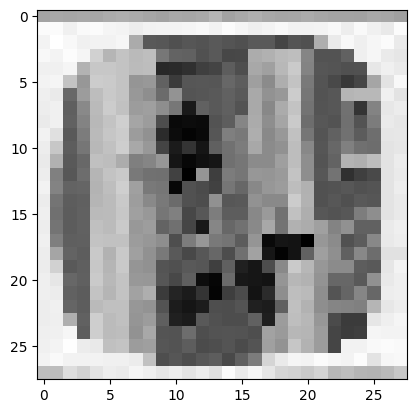

Prediction:  marge simpson
Label:  marge simpson


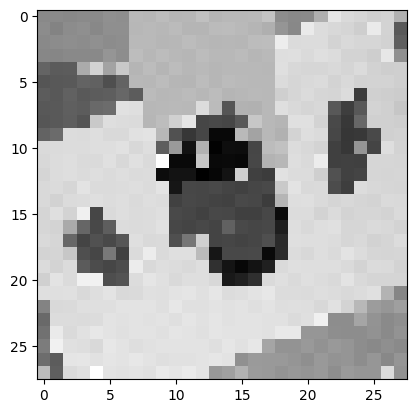

Prediction:  moe szyslak
Label:  ned flanders


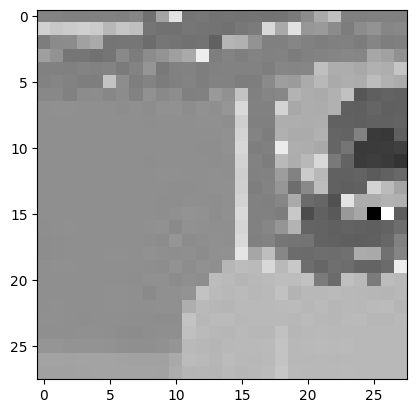

Prediction:  moe szyslak
Label:  charles montgomery_burns


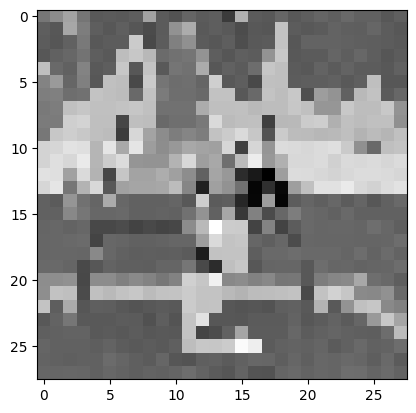

Prediction:  moe szyslak
Label:  moe szyslak


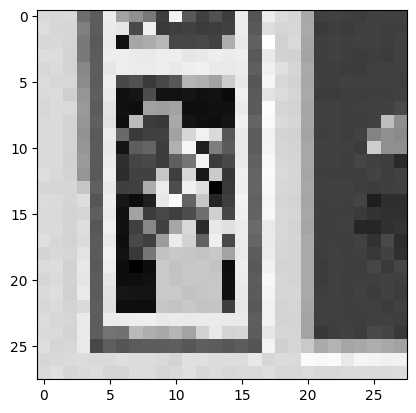

In [105]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)